# Periodic Lockdown
What would happen if we made a Periodic Lockdown with constant period? Could that be a possible way out of the Pandemic?

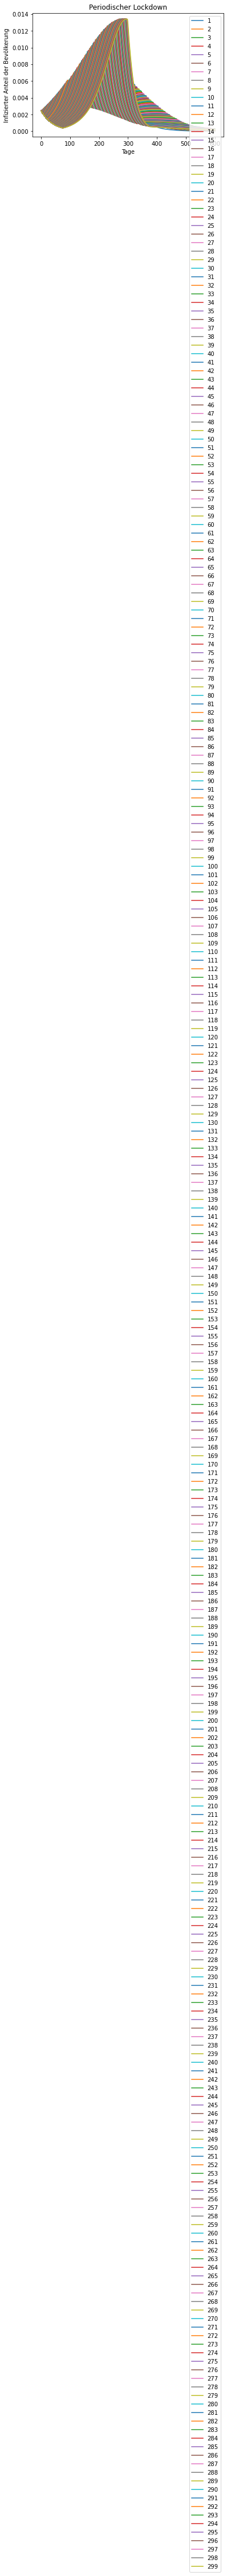

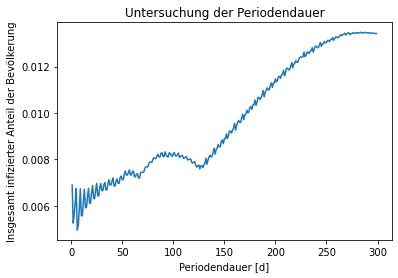

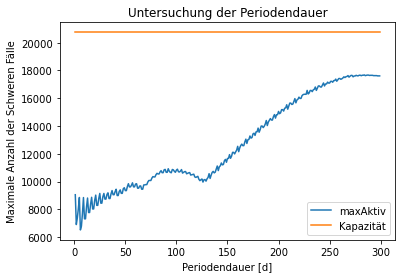

In [10]:
# Import benötigter Funktionen
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp # Besserer Integrator



R0_in = 0.8 # R value, while in lockdown
R0_out = 1.2 # R value while out of lockdown
beta = 0.12
ldp = 1/3 # Part of the Time spent in lockdown

N = 8.2 * 10**7
infiziert = 2* 10**5/N
nichtInfiziert = 1 - infiziert
p0 = [nichtInfiziert, infiziert, 0]
t = np.linspace(0,600,365)





class Lockdown:
    def __init__(self, R0_in, R0_out, length, periodicity):
        self.R0_in = R0_in
        self.R0_out = R0_out
        self.length = length
        self.periodicity = periodicity
        self.daysIn = 0
        self.daysOut = 0
        self.counter = 0

        self.active = True
        self.oldTime = 0

    def getAlpha(self, t):
        dt = t - self.oldTime
        self.oldTime = t
        if self.daysOut > self.periodicity and not self.active:
            self.daysIn = 0
            self.active = True
            #print("Start at t = {} after {} days out".format(t, self.daysOut))
        if self.daysIn > self.length and self.active:
            self.daysOut = 0
            self.active = False
            #print("End  at t = {}, after {} days in".format(t, self.daysIn))
        if self.active:
            R0 = self.R0_in
            self.daysIn += dt
        else:
            self.active = False
            R0 = self.R0_out
            self.daysOut += dt 
        return R0 * beta
    




epsilon  = 0.10
oldTime =0
def odes(p, t, lockdown):
    global oldTime, plt
    x, y, z = p
    
    alpha = lockdown.getAlpha(t)
    
    oldTime = t
    dx = - alpha* x* y
    dz = beta * y

    dy = -(dx + dz)
    return [dx, dy, dz]

R0_in = 0.8
R0_out = 1.2
ldp = 1/4

N = 8.2 * 10**7
infiziert = 2* 10**5/N
nichtInfiziert = 1 - infiziert
p0 = [nichtInfiziert, infiziert, 0]
t = np.linspace(0,600,365)

maxInfected = []
maxActive = []
lockdownPeriods = []
counter = 0
for i in range(1, 300, 1):
    length = ldp * i
    periodicity = i -length
    
    lockdown = Lockdown(R0_in, R0_out, length, periodicity)
    p0 = [nichtInfiziert, infiziert, 0]
    x, y, z = odeint(odes, p0, t, hmax = 1, args=(lockdown,)).T
    
    plt.plot(t, y, label = str(i))
    counter = 0
    
    maxInfected.append(max(y))
    lockdownPeriods.append(i)
    maxActive.append(max(y))
    

maxInfected = np.array(maxInfected)
maxActive = np.array(maxActive)
lockdownPeriods = np.array(lockdownPeriods)


plt.title("Periodischer Lockdown")
plt.xlabel("Tage")
plt.ylabel("Infizierter Anteil der Bevölkerung")
plt.legend()
plt.show()

plt.title("Untersuchung der Periodendauer")
plt.xlabel("Periodendauer [d]")
plt.ylabel("Insgesamt infizierter Anteil der Bevölkerung")
plt.plot(lockdownPeriods, maxInfected)
plt.show()

plt.title("Untersuchung der Periodendauer")
plt.xlabel("Periodendauer [d]")
plt.ylabel("Maximale Anzahl der Schweren Fälle")
plt.plot(lockdownPeriods, maxActive*N*2/125, label='maxAktiv')
intensivBetten = 20752
plt.plot(lockdownPeriods, [intensivBetten] * len(lockdownPeriods), label="Kapazität")
plt.legend()
plt.show()

#Time instead of ratio